In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/cellua_task2_dataset/final_internship_data.csv")

In [4]:
df.shape

(500000, 26)

In [ ]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [5]:
df.dropna(axis=0,inplace= True)

In [ ]:
df.shape

(499995, 26)

In [5]:
map_month = {
    1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
}
df["month_label"] = df["month"].map(map_month)

In [6]:
df.drop(columns=['User ID'],inplace=True)

In [ ]:
df['Weather'].value_counts()

,count
Weather,
sunny,100433
cloudy,100062
rainy,99972
stormy,99955
windy,99578


In [ ]:
df['Car Condition'].value_counts()

,count
Car Condition,
Very Good,125310
Bad,124977
Good,124967
Excellent,124741


In [ ]:
df['Traffic Condition'].value_counts()

,count
Traffic Condition,
Congested Traffic,166846
Dense Traffic,166581
Flow Traffic,166568


In [7]:
taffic_encoding={'Flow Traffic':0,'Dense Traffic':1,'Congested Traffic':2}

In [8]:
df['Traffic Condition']=df['Traffic Condition'].map(taffic_encoding)

In [9]:
LE=LabelEncoder()

In [10]:
df['Weather']=LE.fit_transform(df['Weather'])

In [11]:
car_condition_encoding={'Bad':0,'Good':1,'Very Good':2,'Excellent':4}

In [12]:
df['Car Condition']=df['Car Condition'].map(car_condition_encoding)

In [13]:
df.drop([ 'User Name', 'Driver Name', 'pickup_datetime','key'], axis=1,inplace=True)

In [14]:
df.shape

(500000, 22)

In [ ]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,month_label
0,2,4,2,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,...,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,June
1,4,0,0,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,...,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,January
2,0,2,2,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,...,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,August
3,2,2,0,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,...,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,April
4,0,2,2,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,...,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,March


In [15]:
cols = ['fare_amount', 'distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']


Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR)))

df[cols] = df[cols][~outlier_mask]

In [16]:
df.shape

(500000, 22)

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(411141, 22)

In [19]:
df.drop(['month_label'],axis=1,inplace=True)

In [20]:
from sklearn.metrics.pairwise import haversine_distances

def haversine(row):
    pickup = [row['pickup_latitude'], row['pickup_longitude']]
    dropoff = [row['dropoff_latitude'], row['dropoff_longitude']]
    return haversine_distances([pickup], [dropoff])[0][0] * 3958.8

df['haversine_distance'] = df.apply(haversine, axis=1)

In [21]:
SE=StandardScaler()

In [22]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'haversine_distance'],
      dtype='object')

In [23]:
df['pickup_latitude']=SE.fit_transform(df[['pickup_latitude']])

In [24]:
df['pickup_longitude']=SE.fit_transform(df[['pickup_longitude']])

In [25]:
df['dropoff_latitude']=SE.fit_transform(df[['dropoff_latitude']])

In [26]:
df['dropoff_longitude']=SE.fit_transform(df[['dropoff_longitude']])

In [27]:
df['haversine_distance']=SE.fit_transform(df[['haversine_distance']])

In [28]:
df['passenger_count']=SE.fit_transform(df[['passenger_count']])

In [29]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,haversine_distance
2,0,2,2,5.7,-0.042013,0.410614,-0.599204,-0.119809,0.245607,0,...,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,-0.607389
3,2,2,0,7.7,-0.317777,-0.946984,-0.618637,0.223922,-0.520925,4,...,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,0.307475
4,0,2,2,5.3,0.877390,0.735835,1.468855,1.395711,-0.520925,7,...,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,-0.211764
5,4,3,2,12.1,-1.186384,-1.020012,0.497997,0.230359,-0.520925,9,...,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251,0.948624
6,4,4,0,7.5,0.129775,-0.053133,0.443585,0.532047,-0.520925,20,...,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260,-0.499479


In [30]:
df = df[df['fare_amount'] > 0]

In [31]:

df['log_fare'] = np.log(df['fare_amount'])

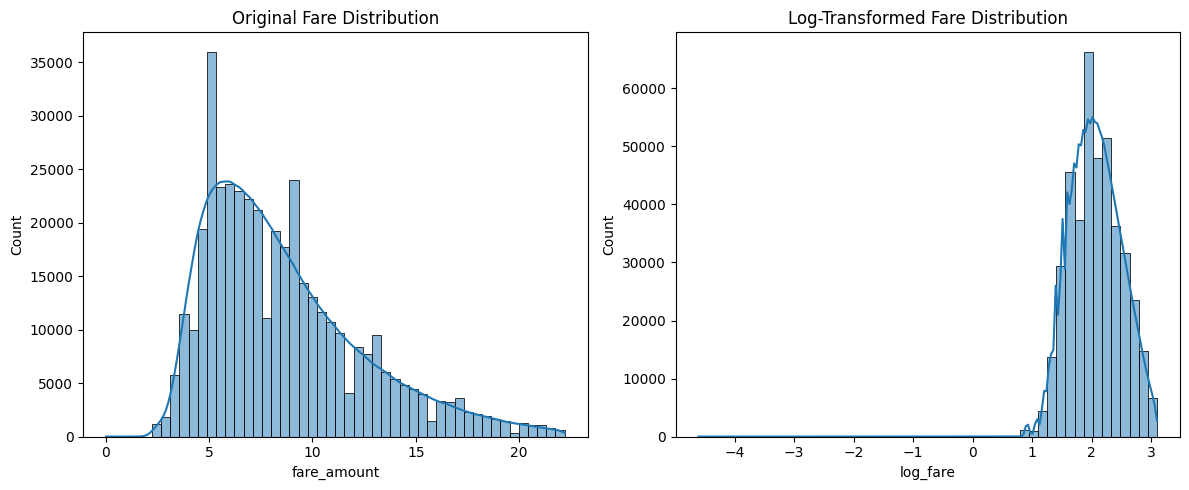

In [32]:
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(df['fare_amount'], kde=True, bins=50)
plt.title('Original Fare Distribution')

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['log_fare'], kde=True, bins=50)
plt.title('Log-Transformed Fare Distribution')

plt.tight_layout()
plt.show()

In [33]:
print("Original Skewness:", df['fare_amount'].skew())
print("Log-Transformed Skewness:", df['log_fare'].skew())

Original Skewness: 1.0170935185199006
Log-Transformed Skewness: 0.08138595172652559


# train test split

In [35]:
y=df['fare_amount']

In [36]:
df.drop(['fare_amount'],axis=1,inplace= True)

In [37]:
x=df

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# feature selection

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
X_train.shape

(328912, 21)

In [37]:
X_train.head()

,Car Condition,Weather,Traffic Condition,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,...,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,haversine_distance
327513,1,2,1,0.417783,0.374028,-0.318177,-0.402919,3.311735,21,28,...,2,2012,42.348804,34.342949,19.124278,17.678096,9.527266,2.025876,2.660545,0.126891
277092,2,4,1,-0.205010,-0.031413,-1.336930,-0.944443,-0.520925,4,21,...,4,2010,42.998653,31.410825,21.998478,14.512988,6.629051,2.668342,2.527566,0.521935
47725,4,0,2,2.081159,2.925697,2.583815,2.565354,3.311735,22,16,...,4,2011,47.190437,46.243524,14.139877,32.079308,24.099528,1.020278,-2.020969,-0.666408
149722,2,4,2,1.679002,1.009218,1.236380,0.762160,-0.520925,10,23,...,0,2009,42.118457,39.640032,14.426259,23.453645,15.192794,0.608576,2.335439,-1.025259
491405,1,0,0,0.939424,0.525585,1.015505,0.227118,-0.520925,8,20,...,5,2014,41.450458,37.438593,16.102892,20.763947,12.466400,0.656575,-2.764552,-1.130540


In [ ]:
y_train.head()

,fare_amount
327513,4.9
277092,6.5
47725,6.1
149722,3.3
491405,4.5


In [ ]:
LG=LinearRegression()

In [ ]:
sfs = SFS(LG,
         k_features = (1, 20),
          forward= True,
          verbose= 2,
          scoring= 'r2',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished

[2025-03-04 18:24:41] Features: 1/20 -- score: 0.645078133621884[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.0s finished

[2025-03-04 18:24:44] Features: 2/20 -- score: 0.6752882877365084[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.3s finished

[2025-03-04 18:24:46] Features: 3/20 -- score: 0.6789058887191[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.5s finished

[2025-03-04 18:24:49] Features: 4/20 -- score: 0.6810839482265514[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    3.2s finished

[202

In [ ]:
df_= pd.DataFrame.from_dict(sfs.get_metric_dict()).T    #needed traspose to make it from row to table
df_= df_[["feature_idx","avg_score"]]
df_

,feature_idx,avg_score
1,"(18,)",0.645078
2,"(12, 18)",0.675288
3,"(6, 12, 18)",0.678906
4,"(6, 10, 12, 18)",0.681084
5,"(6, 10, 12, 18, 19)",0.682849
6,"(3, 6, 10, 12, 18, 19)",0.68431
7,"(3, 5, 6, 10, 12, 18, 19)",0.685376
8,"(3, 5, 6, 10, 12, 15, 18, 19)",0.686467
9,"(3, 5, 6, 8, 10, 12, 15, 18, 19)",0.686842
10,"(3, 5, 6, 8, 10, 11, 12, 15, 18, 19)",0.687136


In [ ]:
fs_LG=sfs.k_feature_names_

In [ ]:
fs_LG


('Car Condition',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'hour',
 'day',
 'month',
 'weekday',
 'year',
 'jfk_dist',
 'ewr_dist',
 'lga_dist',
 'sol_dist',
 'nyc_dist',
 'distance',
 'bearing')

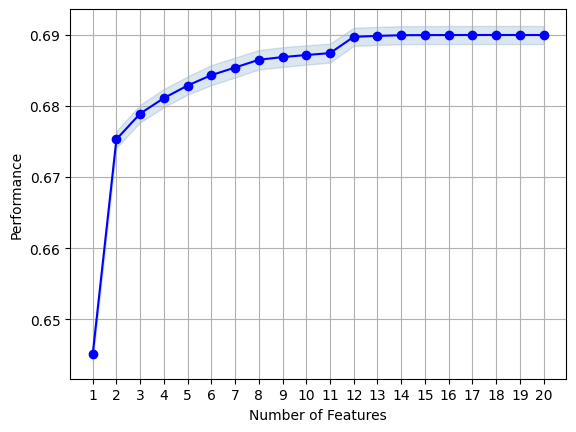

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict())
plt.grid()

In [41]:
rfc = RandomForestRegressor()
#using random forest classifier for feature selection
#rfc.feature_importances_
selector = SelectFromModel(rfc)
selector.fit(X_train, y_train)

feature_ps = selector.get_support()
features_rfc = [X_train.columns[i] for i in range(len(X_train.columns)) if feature_ps[i]]

print(features_rfc)

['log_fare']


# modelling

In [40]:
X_train.drop(['month_label'], axis =1,inplace=True)

In [ ]:
X_test.drop(['month_label'], axis =1,inplace=True)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr=LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2=r2_score(y_test, y_pred)
print(f"R2_score(R2): {r2:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 4.52
R2_score(R2): 0.69
Root Mean Squared Error (RMSE): 2.13


In [42]:
rfr= RandomForestRegressor()

In [43]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
y_pred = rfr.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_rfr:.2f}")

r2_rfr=r2_score(y_test, y_pred)
print(f"R2_score(R2): {r2_rfr:.2f}")

rmse_rfr = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.2f}")

Mean Squared Error (MSE): 3.17
R2_score(R2): 0.78
Root Mean Squared Error (RMSE): 2.13


In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()


In [46]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
y_pred = dtr.predict(X_test)

mse_dtr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_dtr:.2f}")

r2_dtr=r2_score(y_test, y_pred)
print(f"R2_score(R2): {r2_dtr:.2f}")

rmse_dtr = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse_dtr:.2f}")

Mean Squared Error (MSE): 6.78
R2_score(R2): 0.53
Root Mean Squared Error (RMSE): 2.13


In [48]:
from sklearn.svm import SVR

In [58]:
svr=SVR(kernel='linear',C=2.0,epsilon=0.1)

In [ ]:
svr.fit(X_train,y_train)

In [ ]:
y_pred = svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")

r2_svr=r2_score(y_test, y_pred)
print(f"R2_score(R2): {r2_svr:.2f}")

rmse_svr = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")

In [53]:
import xgboost as xg

In [55]:
xgr=xg.XGBRegressor(n_estimators=100,learning_rate=0.1)

In [56]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred =  xgr.predict(X_test)

mse_xgr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_xgr:.2f}")

r2_xgr=r2_score(y_test, y_pred)
print(f"R2_score(R2): {r2_xgr:.2f}")

rmse_xgr = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse_xgr:.2f}")

Mean Squared Error (MSE): 3.03
R2_score(R2): 0.79
Root Mean Squared Error (RMSE): 2.13
